In [1]:
!kaggle datasets download -d whenamancodes/credit-card-customers-prediction --unzip

/bin/bash: kaggle: command not found


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataframe = pd.read_csv('/work/Credit-Card-Customers-Prediction/BankChurners.csv')
df_clients = dataframe[dataframe['Attrition_Flag'] != 'Attrited Customer']
df = dataframe[dataframe['Attrition_Flag'] == 'Attrited Customer']
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
82,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,...,2158.0,0,2158.0,0.585,615,12,0.714,0.000,0.99763,0.002366
99,711887583,Attrited Customer,47,M,2,Unknown,Married,$80K - $120K,Blue,37,...,5449.0,1628,3821.0,0.696,836,18,0.385,0.299,0.99700,0.002997
127,720201033,Attrited Customer,53,M,2,Graduate,Married,$80K - $120K,Blue,41,...,11669.0,2227,9442.0,0.622,720,23,0.353,0.191,0.99447,0.005530
140,789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,...,8025.0,0,8025.0,0.654,673,18,0.800,0.000,0.99672,0.003282
144,767712558,Attrited Customer,59,M,1,College,Single,$60K - $80K,Blue,53,...,14979.0,0,14979.0,0.710,530,10,1.000,0.000,0.99639,0.003608


In [4]:
print('Shape = ',df.shape)

print('\n Nulls = \n', df.isnull().sum())


Shape =  (1627, 23)

 Nulls = 
 CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category 

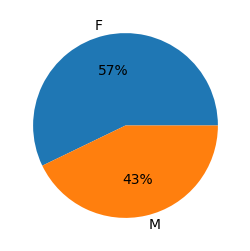

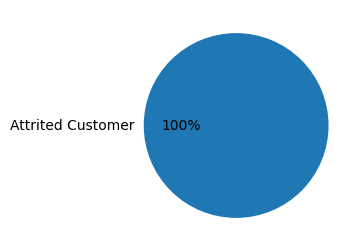

In [43]:
plt.figure(figsize=(3, 3))  

gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
plt.pie(sizes, labels= labels, autopct='%1.f%%')

plt.show()


plt.figure(figsize=(3, 3)) 

af_counts = df['Attrition_Flag'].value_counts()
labels = af_counts.index
sizes = af_counts.values
plt.pie(sizes, labels= labels, autopct='%1.f%%')

plt.show()


<Figure size 1200x600 with 0 Axes>

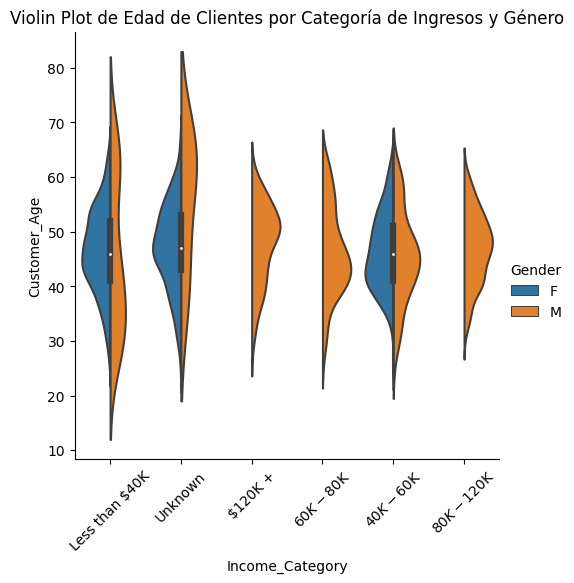

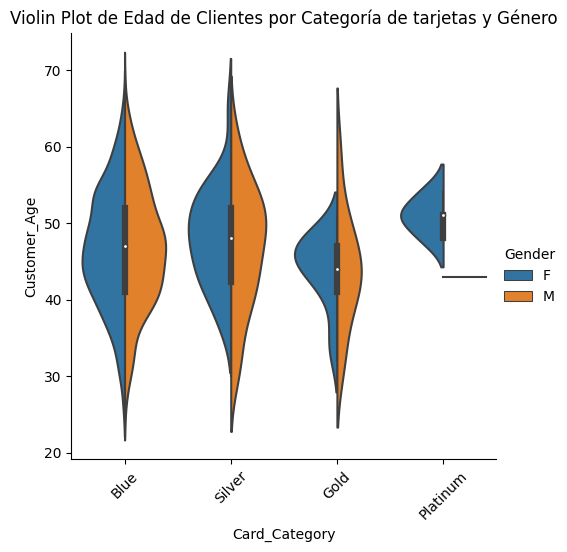

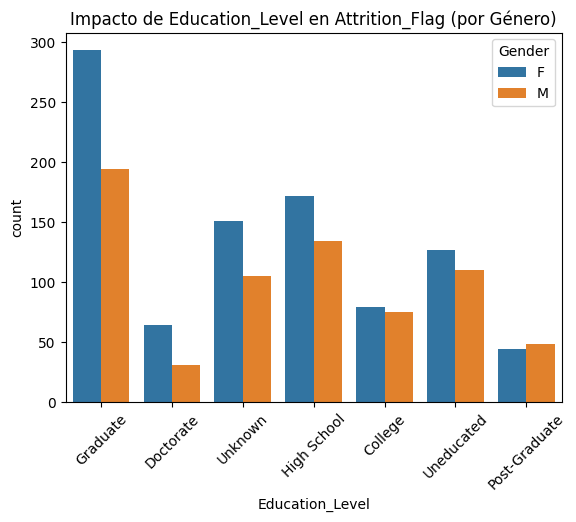

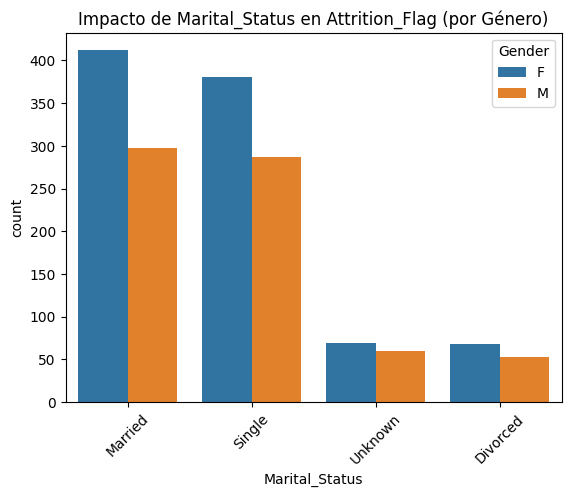

In [45]:

plt.figure(figsize=(12, 6))

sns.catplot(x="Income_Category", y="Customer_Age", hue="Gender", kind="violin", split=True, data=df)
plt.title('Violin Plot de Edad de Clientes por Categoría de Ingresos y Género')
plt.xticks(rotation=45, fontsize=10) 
plt.show()

sns.catplot(x="Card_Category", y="Customer_Age", hue="Gender", kind="violin", split=True, data=df)
plt.title('Violin Plot de Edad de Clientes por Categoría de tarjetas y Género')
plt.xticks(rotation=45, fontsize=10) 
plt.show()


sns.countplot(data=df, x='Education_Level', hue='Gender')
plt.title('Impacto de Education_Level en Attrition_Flag (por Género)')
plt.xticks(rotation=45, fontsize=10) 
plt.show()

sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.title('Impacto de Marital_Status en Attrition_Flag (por Género)')
plt.xticks(rotation=45, fontsize=10)  # Rota y ajusta el tamaño de las etiquetas del eje x
plt.show()


In [25]:
print('AVG Utilization ratio on clientes ',round(df_clients['Avg_Utilization_Ratio'].mean(),2),' on Churners ',round(df['Avg_Utilization_Ratio'].mean(),2))
print('Months inactive avg on clientes ',round(df_clients['Months_Inactive_12_mon'].mean(),2),' on Churners ',round(df['Months_Inactive_12_mon'].mean(),2))
print('Total transactions avg on clientes ',round(df_clients['Total_Trans_Amt'].mean(),2),' on Churners ',round(df['Total_Trans_Amt'].mean(),2))


AVG Utilization ratio on clientes  0.3  on Churners  0.16
Months inactive avg on clientes  2.27  on Churners  2.69
Total transactions avg on clientes  4654.66  on Churners  3095.03


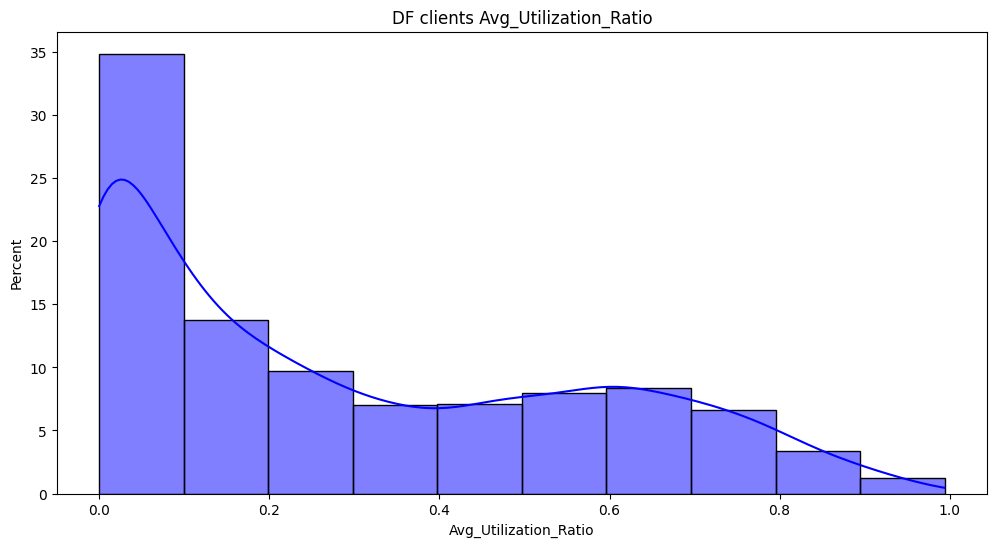

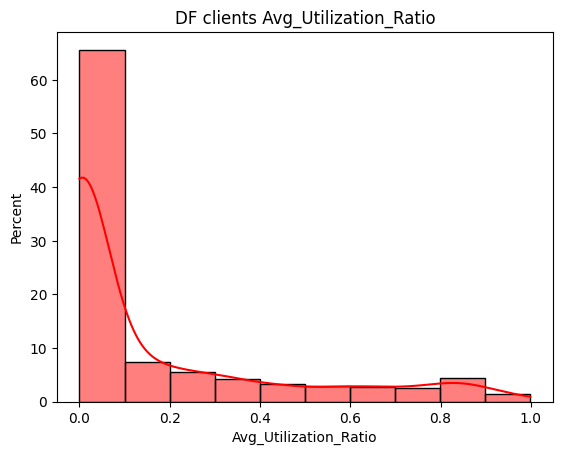

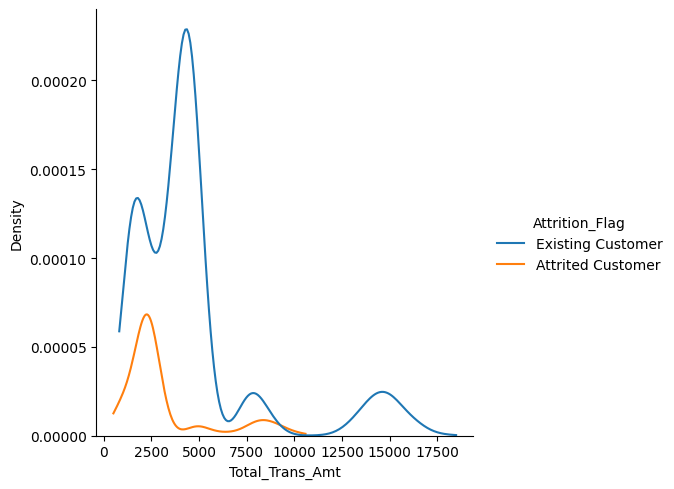

In [52]:
plt.figure(figsize=(12, 6))


#sns.displot(dataframe, x="Avg_Utilization_Ratio",y = 'Credit_Limit', hue= 'Attrition_Flag')
sns.histplot(df_clients["Avg_Utilization_Ratio"], bins=10 ,kde=True, color='blue', stat= 'percent')
plt.title('DF clients Avg_Utilization_Ratio')
g.set_xticklabels(rotation=45, fontsize=10)
plt.show()

sns.histplot(df["Avg_Utilization_Ratio"], bins=10, kde=True, color='red', stat= 'percent')
plt.title('DF clients Avg_Utilization_Ratio')
g.set_xticklabels(rotation=45, fontsize=10)
plt.show()


sns.displot(dataframe, x="Total_Trans_Amt", kind="kde", cut=0, hue= 'Attrition_Flag')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a294b2d6-f686-4c32-aa0c-6491cb6a0c52' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>